READ ME 

This code require pandas, nump, and matplotlib to run



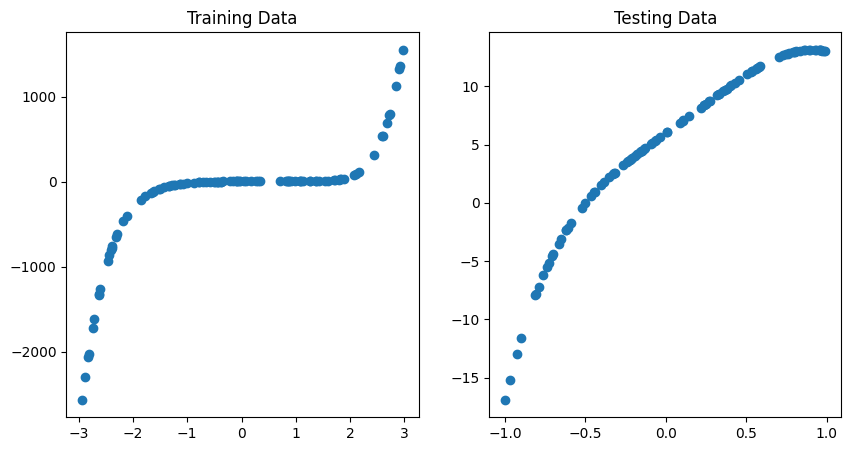

In [1]:
# Set up code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Plot the training Data and the test data
np.random.seed(1234)

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
#print(f"x train: {x_train}\ny train: {y_train}")

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


fig, ax = plt.subplots(1, 2, figsize =(10,5))

ax[0].scatter(x_train, y_train)
ax[0].set_title("Training Data")

ax[1].scatter(x_test, y_test)
ax[1].set_title("Testing Data")

plt.show()


In [3]:

# Problem 1

np.random.seed(1234)

x_train = np.load('x_train.npy')
x_train = x_train.reshape(-1, 1)
y_train = np.load('y_train.npy')

x_test = np.load('x_test.npy')
x_test = x_test.reshape(-1,1)
y_test = np.load('y_test.npy')

def cost_function(y_actual, y_pred):
    """
    Calculates the mean squared loss between the actual and predicted values.

    Parameters:
    y_actual (numpy.ndarray): Array of actual values.
    y_pred (numpy.ndarray): Array of predicted values.

    Returns:
    loss (float): Mean squared loss between the actual and predicted values.
    """
    y_actual = y_actual.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    
    cost = np.sum((y_actual - y_pred) ** 2) / y_actual.shape[0] 
    
    # print("Cost: ", cost)
    return cost

def loss_function_regularized(y_actual, y_pred, w, lambda_):
    """
    Calculates the mean squared loss between the actual and predicted values with L2 regularization.

    Parameters:
    y_actual (numpy.ndarray): Array of actual values.
    y_pred (numpy.ndarray): Array of predicted values.
    w (numpy.ndarray): Weight vector of shape (n_features,).
    lambda_ (float): Regularization parameter.

    Returns:
    loss (float): Mean squared loss between the actual and predicted values with L2 regularization.
    """
    y_actual = y_actual.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    
    cost = np.sum((y_actual - y_pred) ** 2) / y_actual.shape[0] 
    regularization = lambda_ * np.sum(w ** 2)
    
    # print("Reg: ", cost + regularization)
    return cost + regularization

def find_gradients_regularized(x, y_actual, y_pred, w, lambda_):
    """
    Calculates the gradients of the weights and bias for a linear regression model with L2 regularization.

    Parameters:
    x (numpy.ndarray): Input features of shape (m, n), where m is the number of examples and n is the number of features.
    y_actual (numpy.ndarray): Actual output values of shape (m, 1).
    y_pred (numpy.ndarray): Predicted output values of shape (m, 1).
    w (numpy.ndarray): Weight vector of shape (n_features,).
    lambda_ (float): Regularization parameter.

    Returns:
    dW (numpy.ndarray): Gradients of the weights of shape (n, 1).
    dB (float): Gradient of the bias.
    """
    
    y_actual = y_actual.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    examples = x.shape[0]

    dW = (1 / examples) * np.dot(x.T, (y_pred - y_actual)) + 2 * lambda_ * w
    dB = (1 / examples) * np.sum((y_pred - y_actual))

    return dW, dB

def find_gradients(x, y_actual, y_pred):
    """
    Calculates the gradients of the weights and bias for a linear regression model.

    Parameters:
    x (numpy.ndarray): Input features of shape (m, n), where m is the number of examples and n is the number of features.
    y_actual (numpy.ndarray): Actual output values of shape (m, 1).
    y_pred (numpy.ndarray): Predicted output values of shape (m, 1).

    Returns:
    dW (numpy.ndarray): Gradients of the weights of shape (n, 1).
    dB (float): Gradient of the bias.
    """
    y_actual = y_actual.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    m = x.shape[0]

    dW = (1 / m) * np.dot(x.T, (y_pred - y_actual))

    dB = (1 / m) * np.sum((y_pred - y_actual))

    return dW, dB

def add_features(x, num_features):
    """
    Adds n number of features of polynomial basis functions to the x data set.

    Args:
    numFeats (int): The number of polynomial basis functions to add.
    x (np.array): The input data set.

    Returns:
    x_poly (np.array): The input data set with polynomial basis functions added.
    """

    #Pandas dataframe
    data = pd.DataFrame(np.zeros((x.shape[0],num_features)))
     
    for i in range(1,num_features+1):
        #For an entire column, make it the input array to the power of i
        data.iloc[:,i-1] = (x**i).reshape(-1,1)
    
    #Make the dataframe an numpy array
    x_poly = np.array(data.values.tolist())
    
    return x_poly
    
def predict_y(x, w, b):
    """
    Predicts the value of y based on the input x, weight vector w, and bias b.

    Parameters:
    x (numpy.ndarray): Input array of shape (n_samples, n_features).
    w (numpy.ndarray): Weight vector of shape (n_features,).
    b (float): Bias value.

    Returns:
    y_pred (numpy.ndarray): Predicted values of y based on the input x, weight vector w, and bias b.
    """

    y_pred = np.dot(x, w) + b
    return y_pred

def train(x_in, y, learning_rate, iterations, num_features = 0):
    """
    Trains a linear regression model using gradient descent.

    Args:
        x_in (numpy.ndarray): The input features of shape (m, n), where m is the number of examples and n is the number of features.
        y (numpy.ndarray): The target values of shape (m, 1).
        learning_rate (float): The learning rate for gradient descent.
        iterations (int): The number of iterations to perform.
        num_features (int): Number of basis functions to add to the x_in 
    Returns:
        tuple: A tuple containing the learned weights (w), bias (b), and costs of the linear regression model.

    """

    #Empty list for costs to be appended to
    losses = []

    #Add the features to the training data
    if num_features != 0:
        x = add_features(x_in, num_features)
    else:
        x = x_in
        x.reshape(-1, 1)

    #Store the shape of x as examples and features
    examples, features = x.shape 

    w = np.zeros((features, 1))
    b = 0

    for i in range(iterations):
        #Forward Pass -- calculate the predictions 
        y_pred = predict_y(x, w, b)
        #Get the gradients
        dW, dB = find_gradients(x, y, y_pred)
        #Update Weights and Bias 
        w -= learning_rate * dW
        b -= learning_rate * dB
        cost = cost_function(y, y_pred)
        losses.append(cost)

    return w, b, losses


def train_regularized(x_in, y, learning_rate, iterations, lambda_, num_features = 0):
    """
    Trains a linear regression model using gradient descent with L2 regularization.

    Args:
        x_in (numpy.ndarray): The input features of shape (m, n), where m is the number of examples and n is the number of features.
        y (numpy.ndarray): The target values of shape (m, 1).
        learning_rate (float): The learning rate for gradient descent.
        iterations (int): The number of iterations to perform.
        lambda_ (float): The regularization parameter.
        num_features (int): Number of features to add as basis functions

    Returns:
        tuple: A tuple containing the learned weights (w) and bias (b) of the linear regression model.

    """

    #Empty list for costs to be appended to
    costs = []

    #Add the features to the training data
    if num_features != 0:
        x = add_features(x_in, num_features)
    else:
        x = x_in
        x.reshape(-1, 1)

    #Store the shape of x as examples and features
    examples, features = x.shape 

    w = np.zeros((features, 1))
    b = 0

    for i in range(iterations):

        #Forward Pass -- calculate the predictions 
        y_pred = predict_y(x, w, b)

        #Get the gradients
        dW, dB = find_gradients_regularized(x, y, y_pred, w, lambda_)
        
        #Update Weights and Bias 
        w -= learning_rate * dW
        b -= learning_rate * dB

        cost = loss_function_regularized(y, y_pred, w, lambda_)
        costs.append(cost)

    return w, b, costs


After plotting the data I can see that there is a non-linear relationship with the between the x and y. Given that the relationship is non-linear it will require additional basis functions to be added to it. I am going to add polynomial basis functions because of this non-linearity. In order to do this I will add polynomial functions to the nth degree, and after testing I will be able to determine what the optimal nth degree will be.

In [7]:
num_features = 7

w_trained, b_trained, costs_trained = train(x_train, y_train, .00001, 1500000, num_features)


print("Final Cost:\n", costs_trained[-1])
print("Trained weights (w):\n", w_trained)
print("Trained bias (b):\n", b_trained)


/var/folders/v2/z45vnn656wd_fz__jl123gn40000gn/T/ipykernel_25101/3744911154.py:119: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[ 2.91868393]
 [ 2.90791482]
 [-0.08495122]
 [-0.50477522]
 [ 1.79352362]
 [-1.23534558]
 [ 1.08241643]
 [ 2.68025445]
 [ 2.06619858]
 [-1.33992751]
 [ 2.43324236]
 [-1.86029427]
 [-1.23157655]
 [ 1.41744377]
 [-0.16515776]
 [ 2.72208526]
 [-0.03066972]
 [-1.13549043]
 [-0.21916137]
 [ 0.84859955]
 [ 0.05322141]
 [-2.38922265]
 [-0.42556922]
 [-1.633696  ]
 [-2.11759699]
 [ 0.81015801]
 [ 2.84747743]
 [ 2.96838562]
 [-2.46568226]
 [ 0.83784459]
 [-0.37000549]
 [-0.70742193]
 [-1.50405351]
 [-2.30974321]
 [ 1.82118748]
 [ 0.90719396]
 [-0.65888076]
 [-0.43055345]
 [-0.37395616]
 [-2.92920705]
 [-2.37722766]
 [-0.03946923]
 [-0.58847518]
 [-1.0742173 ]
 [ 1.69713442]
 [ 1.53385039]
 [ 2.7289936 ]
 [-0.77708905]
 [ 0.86685316]
 [-2.62563706]
 [ 1.3714642 ]
 [ 2.59540137]
 [-1.52088488]
 [ 

KeyboardInterrupt: 

In [ ]:

x_test_poly = add_features(x_test, num_features)
x_train_poly = add_features(x_train, num_features)

y_pred = predict_y(x_test_poly, w_trained, b_trained)
y_pred_train = predict_y(x_train_poly, w_trained, b_trained)

plt.scatter(x_train, y_pred_train, color='y')
plt.scatter(x_train, y_train)

fig, ax = plt.subplots(1, 2, figsize =(10,5))

ax[0].scatter(x_test, y_pred, color='r')
ax[0].scatter(x_test, y_test)
ax[0].set_title("Test Data -- Unreg")

ax[1].scatter(x_train, y_pred_train, color='r')
ax[1].scatter(x_train, y_train)
ax[1].set_title("Training Data -- Unreg")

#plt.show()

Final Cost:
 0.7541890716971417
Trained weights (w):
 [[ 7.04285886]
 [ 0.60627496]
 [ 6.38849018]
 [-8.15219644]
 [-0.51501111]
 [ 0.01032068]
 [ 1.03265165]]
Trained bias (b):
 5.434534363292679


Text(0.5, 1.0, 'Training Data')

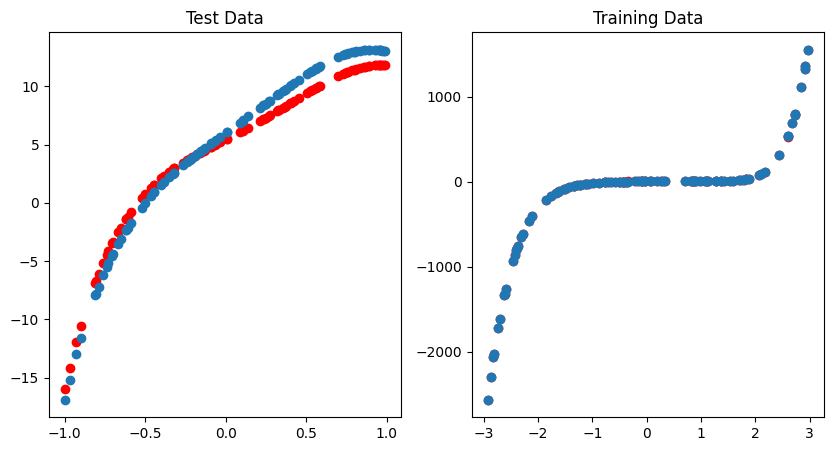

In [19]:
num_features = 7

w_trained_regularized, b_trained_regularized, costs_trained_regularized = train_regularized(x_train, y_train, .00000575, 1500000, .0009, num_features)

print("Final Cost:\n", costs_trained_regularized[-1])
print("Trained weights (w):\n", w_trained_regularized)
print("Trained bias (b):\n", b_trained_regularized)

x_test_poly_reg = add_features(x_test, num_features)
x_train_poly_reg = add_features(x_train, num_features)

y_pred_reg = predict_y(x_test_poly_reg, w_trained_regularized, b_trained_regularized)
y_pred_train_reg = predict_y(x_train_poly_reg, w_trained_regularized, b_trained_regularized)

fig, ax = plt.subplots(1, 2, figsize =(10,5))

ax[0].scatter(x_test, y_pred_reg, color='r')
ax[0].scatter(x_test, y_test)
ax[0].set_title("Test Data")

ax[1].scatter(x_train, y_pred_train_reg, color='r')
ax[1].scatter(x_train, y_train)
ax[1].set_title("Training Data")

After testing and training the model, the optimal degree for the polynomials I found is 7. This means that in addtition to the bias factor (a constant value) there are 7 addtional functions that model x as functions of x to a power of [1, 7]. I wrote a function that adds basis functions to my x dataset first. Then I wrote the cost function for my model by calculating the mean squared loss. I then began my gradient descent method and wrote a predict y method. I predicted my y values by takeing the dot product of my weights and x values and adding my bias factor to that. I got the gradients for my weights and bias factors by computing the dot product of x transpose and the difference in y predictions and y training values divided by the number of examples and taking the sum of the differences in the y values again and dividing by the number of examples, respectively. I then altered my weights and biases by the gradients found multiplied by a learning rate to ensure that the model did not converge to fast or too slow.
I thought my model was insufficient in complexity before finding the optimal hyperparameters, so I added of the above function regularized as well, but they did not perform as well as the non-regularized methods.
The code below calculates the correlational coefficient for both methods and each method has an r^2 value that indicates a strong, positive correlation. The plots for each method also show strong predicitve capability of the model. 

R2:  0.974968778298581
R2 -- REG:  0.9754097429491112


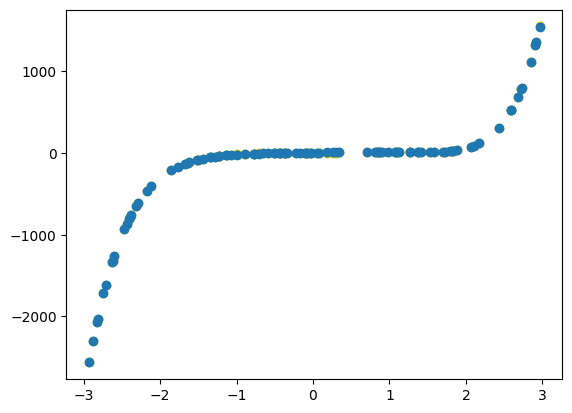

In [29]:
y_test = y_test.reshape(-1, 1)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    mean_y = np.mean(y_pred)
    ss_tot = np.sum((y_true - mean_y) ** 2)

    return 1 - (ss_res / ss_tot)

print("R2: ", r_squared(y_test, y_pred))

print("R2 -- REG: ", r_squared(y_test, y_pred_reg))

plt.scatter(x_train, y_pred_train, color='y')
plt.scatter(x_train, y_train)

In [84]:
#Problem 2

# Read the data from the 'Train' sheet of the Excel file
train_data = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Train')
test_data = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Test')

#print(train_data.head(20))

# Assign columns B-H to x_train


x_train_realty = np.array(train_data.iloc[:, 1:8])
# print(train_data.iloc[:, 1:8], "\n")
# print(x_train_realty)
# Assign column I to y_train
y_train_realty = np.array(train_data.iloc[:, 8]).reshape(-1,1)

# Assign columns B-H to x_train
x_test_realty = np.array(test_data.iloc[:, 1:8])
# Assign column I to y_train
y_test_realty = np.array(test_data.iloc[:, 8]).reshape(-1,1)

# print(f"x_train:\n{x_train}\nx_train.shape:\n{x_train.shape}")
# print(f"y_train:\n{y_train}\ny_train.shape:\n{y_train.shape}")
# print(f"x_test:\n{x_test}\nx_test.shape:\n{x_test.shape}")
# print(f"y_test:\n{y_test}\ny_test.shape:\n{y_test.shape}")

w_realty_trained, b_realty_trained, costs_realty_trained = train_regularized(x_train_realty, y_train_realty, .001, 10000000, .00000000075)


print("Final Cost:\n", costs_realty_trained[-1])
print("Trained weights (w):\n", w_realty_trained)
print("Trained bias (b):\n", b_realty_trained)

Final Cost:
 5006561605.843359
Trained weights (w):
 [[ 209185.841379  ]
 [  10192.81546324]
 [ 228669.12611053]
 [  47994.9592952 ]
 [ 113529.57920341]
 [-151116.11389039]
 [  -2133.47368773]]
Trained bias (b):
 -213616.4311139119


The average least squares error for the data that I got was 5006561605.843359, meaning it is off by a good bit on its predictions. I believe if I had more data I could make a better prediction. My model worked very well for the ambiguous x and y data, so my implementation is correct, but the data for the houses is more complex and might require more training to 
Since the highest value is living area, it has teh greatest impact on the target value. This is not the only feature that impacts the price of the house, so if you were to predict the price without the other variables it would nto be as accurate. 
The least impactful feature is house age because it has the least significant value out of all of the features. Removing this featuer will not have as much of an impact as removing living area, but it will reduce the accuracy of the predictions.

Text(0.5, 1.0, 'Test Data -- LWR')

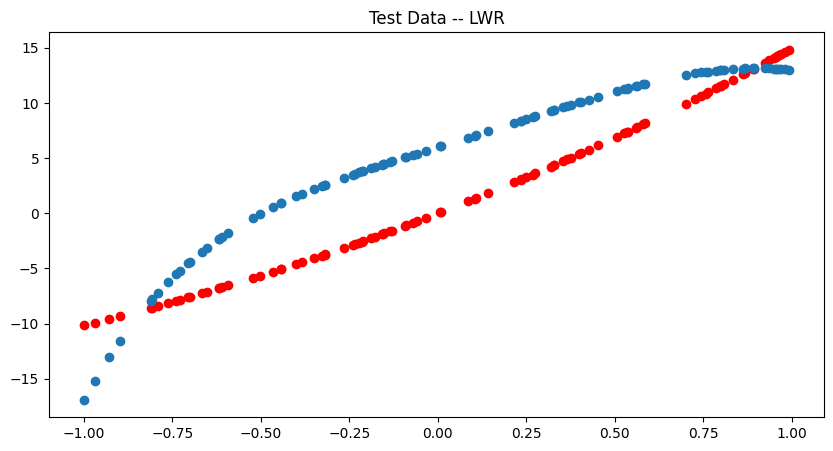

In [13]:
# Problem 3

def locally_weighted_regression(x, y, point, bandwidth):

    examples, features = np.shape(x)
    x_test = np.mat(point)
    weights = np.eye((examples))
    
    for j in range(examples):  # Populate weights with exponentially decaying values
        diff = point - x[j]
        diff = np.array(diff).flatten()
        weights[j, j] = np.exp(diff.dot(diff) / (-2.0 * bandwidth**2))

    XTWX = np.dot(np.dot(x.T, weights), x)
    XTWX_inv = np.linalg.inv(XTWX)
    W = np.dot(np.dot(XTWX_inv, x.T), weights * y.T)  # Calculate the weights of the features
    #W = W.reshape(1, -1)
    return (x_test * W)[0,0]

# x_train_lwr_poly = add_features(x_train, 1)
# x_test_lwr_poly = add_features(x_test, 1)

y_pred_lwr = [locally_weighted_regression(x_train, y_train, point, bandwidth=4) for point in x_test]

fig, ax = plt.subplots(1, 1, figsize =(10,5))

ax.scatter(x_test, y_pred_lwr, color='r')
ax.scatter(x_test, y_test)
ax.set_title("Test Data -- LWR")



I did not need any basis functions for the locally weighted function of the linear regression. Adding basis functions to a locally weighted regression model does not improve very much because the bandwidth hyperparameter is the main way to adjust the function's fit. 
The differences between this function and the first question is that the first function is polynomial regression and it contains several basis functions that globally change the function, whereas locally weighted regression changes on a local level. Polynomial regression is a combination of functions that may or may not be linear, in my implementation I used a 7th degree polynomial to get an accurate model. This implementation uses a normal equation rather than gradient descent to calculate the weights for the model.